<a href="https://colab.research.google.com/github/hakmin1015/PowerSystemEconomics/blob/main/Data_Analysis/Exogeneous_Variable_Analysis/weather_corr_ptemp_vs_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

계절별 체감온도와 최대 전력수요량의 상관계수 분석

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/LoadForecasting/
!pwd

/content/drive/MyDrive/LoadForecasting
/content/drive/MyDrive/LoadForecasting


In [ ]:
import pandas as pd
import numpy as np

from sklearn import datasets
data = pd.read_excel("jeju_asos_data.xlsx")

df = data.iloc[0:59]  # 210101 ~ 210228
df

,date,max,min,p-temp,temp,rain,humidity,solar,cloud,wind
0,20210101,812,641,-1.4,5.5,0.0,54.4,2.55,9.3,3.8
1,20210102,851,599,-1.2,5.9,0.0,56.4,5.45,6.8,4.3
2,20210103,839,556,-1.5,4.5,NaN,57.0,7.85,7.8,2.5
3,20210104,873,673,-0.9,5.9,NaN,57.8,8.38,6.0,1.7
4,20210105,917,654,-2.6,5.6,0.0,66.0,2.77,9.5,4.0
5,20210106,924,685,-3.3,4.0,0.6,60.8,5.71,9.0,5.3
6,20210107,957,722,-11.2,-1.1,7.9,76.5,3.14,9.0,7.5
7,20210108,939,743,-11.2,-1.1,6.1,74.9,3.41,8.9,7.2
8,20210109,906,737,-9.0,1.2,0.9,71.4,3.75,8.3,6.7
9,20210110,885,686,-4.5,3.6,0.0,62.9,2.63,8.9,4.4


In [ ]:
df.keys()

Index(['date', 'max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind'],
      dtype='object')

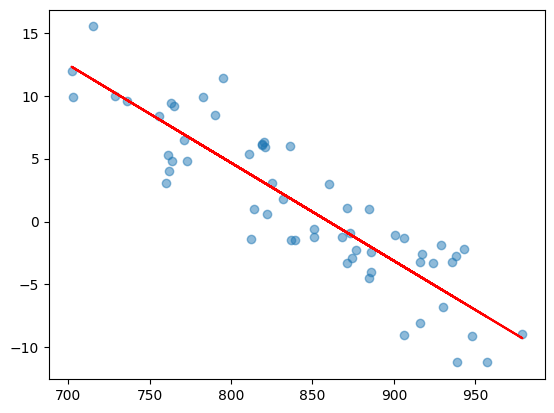

PearsonRResult(statistic=-0.8902447907181663, pvalue=4.01386444365054e-21)


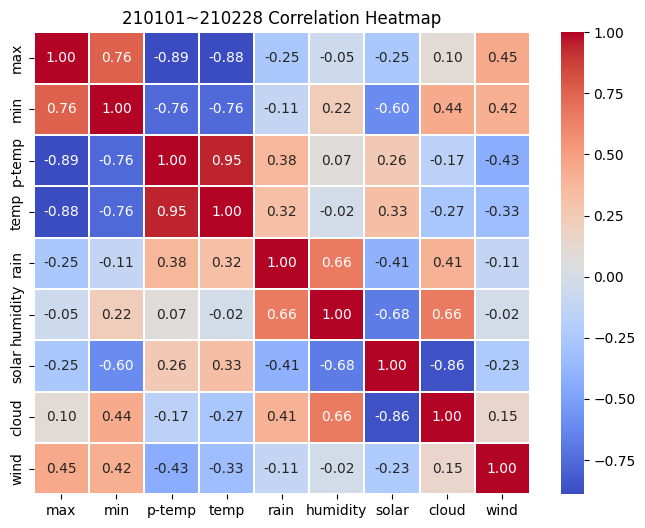

In [ ]:
# 210101~210228

from scipy.stats import linregress

max = df['max'].values
min = df['min'].values
p_temp = df['p-temp'].values
temp = df['temp'].values
rain = df['rain'].values
humidity = df['humidity'].values
solar = df['solar'].values
cloud = df['cloud'].values
wind = df['wind'].values
#dust = df['dust'].values

x = max
y = p_temp

import matplotlib.pyplot as plt
plt.scatter(x, y, alpha=0.5)
#plt.title('cloud vs solar')
#plt.xlabel('cloud')
#plt.ylabel('solar')
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope*x + intercept, color='red', label='Trendline')
plt.show()

import scipy.stats as stats
print(stats.pearsonr(x,y))

import seaborn as sns

# 주어진 데이터
data = df[['max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind']]

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('210101~210228 Correlation Heatmap')
plt.show()

sns.pairplot(df[['max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind']]);

         date  max  min  p-temp  temp  rain  humidity  solar  cloud  wind
59   20210301  745  556     4.5  15.5  11.2      78.3   2.33    9.9   4.0
60   20210302  870  557     2.5   7.5   0.0      67.4  14.26    6.9   4.3
61   20210303  838  584     3.2   9.2   NaN      60.6  17.64    5.1   2.6
62   20210304  839  626     8.4  10.9  26.9      82.4   2.58    9.9   3.2
63   20210305  772  526     9.2  11.9   0.1      82.0  16.24    7.3   2.0
..        ...  ...  ...     ...   ...   ...       ...    ...    ...   ...
146  20210527  698  465    25.1  19.1   2.8      80.9  22.80    5.6   2.7
147  20210528  689  506    29.0  20.7   NaN      63.3  22.02    2.3   3.8
148  20210529  678  441    24.3  19.7   NaN      66.1  29.22    2.0   2.4
149  20210530  679  426    26.9  21.4   NaN      65.0  28.07    0.8   1.7
150  20210531  714  501    27.5  22.0   NaN      67.0  27.27    2.6   1.5

[92 rows x 10 columns]


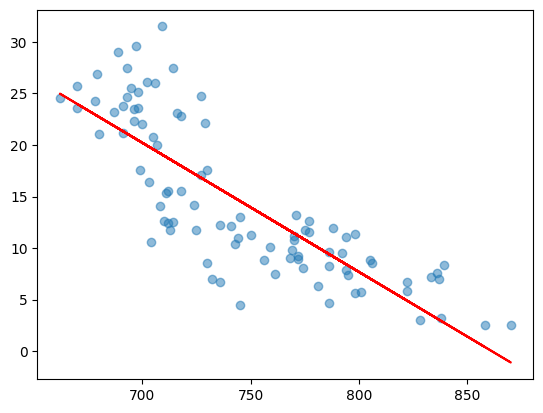

PearsonRResult(statistic=-0.8154999143993412, pvalue=4.310404825551246e-23)


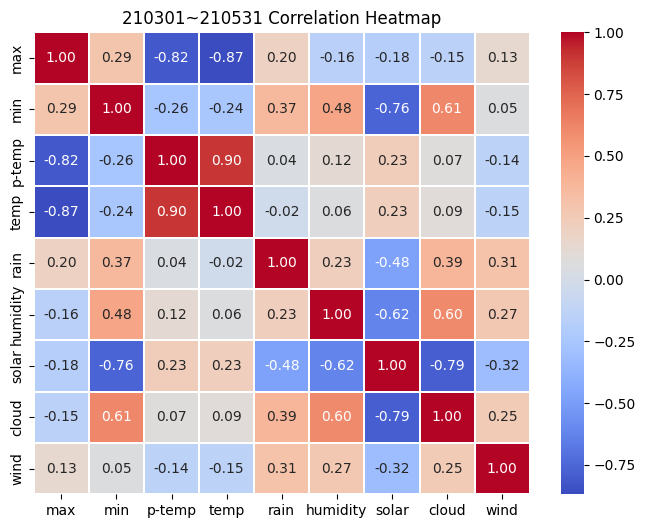

In [ ]:
# 210301~210531
data = pd.read_excel("jeju_asos_data.xlsx")

df = data.iloc[59:151]
print(df)

max = df['max'].values
min = df['min'].values
p_temp = df['p-temp'].values
temp = df['temp'].values
rain = df['rain'].values
humidity = df['humidity'].values
solar = df['solar'].values
cloud = df['cloud'].values
wind = df['wind'].values

x = max
y = p_temp

plt.scatter(x, y, alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope*x + intercept, color='red', label='Trendline')
plt.show()

print(stats.pearsonr(x,y))

# 주어진 데이터
data = df[['max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind']]

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('210301~210531 Correlation Heatmap')
plt.show()

         date  max  min  p-temp  temp  rain  humidity  solar  cloud  wind
151  20210601  727  508    28.0  22.9   NaN      65.0  25.90    5.0   1.9
152  20210602  708  509    28.2  24.5   NaN      57.0  11.72    8.3   2.4
153  20210603  743  503    31.8  23.7   1.5      76.0  17.50    9.0   3.3
154  20210604  700  502    24.6  20.6   2.9      69.4  24.39    8.3   3.2
155  20210605  708  488    29.1  24.1   NaN      59.4  23.41    5.9   3.2
..        ...  ...  ...     ...   ...   ...       ...    ...    ...   ...
238  20210827  945  580    33.5  29.5   0.9      68.4  24.85    3.4   3.8
239  20210828  924  587    33.9  29.2   NaN      70.8  24.42    4.0   4.0
240  20210829  918  580    34.2  29.3   NaN      65.6  23.79    2.5   3.1
241  20210830  953  585    32.7  28.1   0.0      77.1  16.12    5.6   2.2
242  20210831  955  582    31.8  27.9   NaN      72.3  21.77    4.6   1.9

[92 rows x 10 columns]


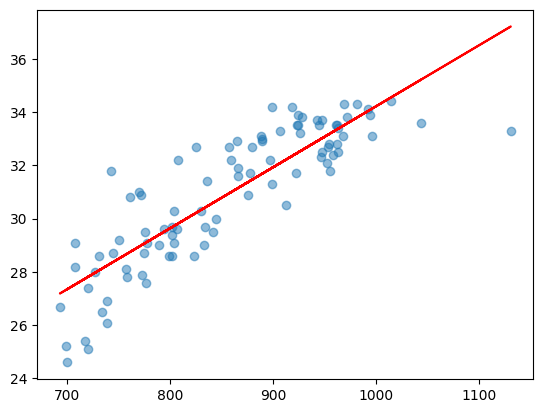

PearsonRResult(statistic=0.861076018102914, pvalue=3.558769871952169e-28)


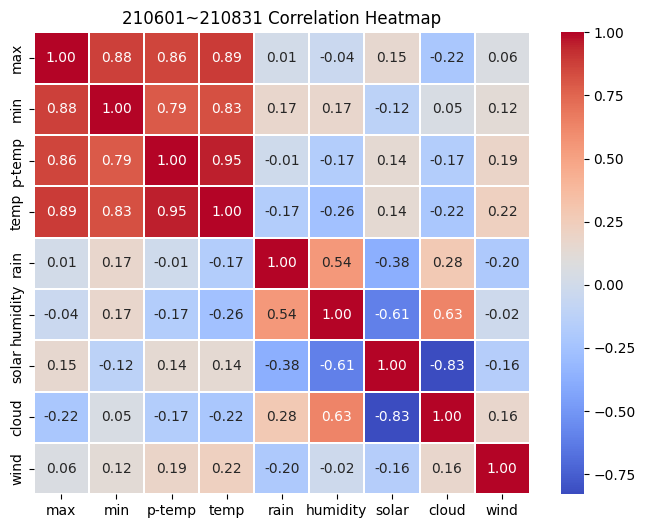

In [ ]:
# 210601~210831
data = pd.read_excel("jeju_asos_data.xlsx")

df = data.iloc[151:243]
print(df)

max = df['max'].values
min = df['min'].values
p_temp = df['p-temp'].values
temp = df['temp'].values
rain = df['rain'].values
humidity = df['humidity'].values
solar = df['solar'].values
cloud = df['cloud'].values
wind = df['wind'].values

x = max
y = p_temp

plt.scatter(x, y, alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope*x + intercept, color='red', label='Trendline')
plt.show()

print(stats.pearsonr(x,y))

# 주어진 데이터
data = df[['max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind']]

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('210601~210831 Correlation Heatmap')
plt.show()

         date  max  min  p-temp  temp  rain  humidity  solar  cloud  wind
243  20210901  960  588    34.5  28.4  14.5      76.6  17.16    9.0   3.5
244  20210902  862  578    29.4  25.0  37.8      87.1   6.75    9.5   2.2
245  20210903  822  569    28.5  24.2  21.8      93.1   4.90    8.1   3.0
246  20210904  793  550    30.6  25.3   NaN      82.5  15.85    7.9   3.2
247  20210905  756  547    28.9  24.5   7.6      87.1   2.91    9.6   3.2
..        ...  ...  ...     ...   ...   ...       ...    ...    ...   ...
329  20211126  795  490     7.4  11.5   NaN      63.8  11.65    0.8   1.8
330  20211127  777  443     7.2  10.6   NaN      60.6  12.52    1.9   2.1
331  20211128  740  424     7.2  13.1   NaN      65.8  12.49    1.8   2.5
332  20211129  772  523     7.7  13.9   NaN      70.1  10.55    2.5   2.5
333  20211130  816  560     3.8  12.5  10.4      80.5   0.36    9.5   6.2

[91 rows x 10 columns]


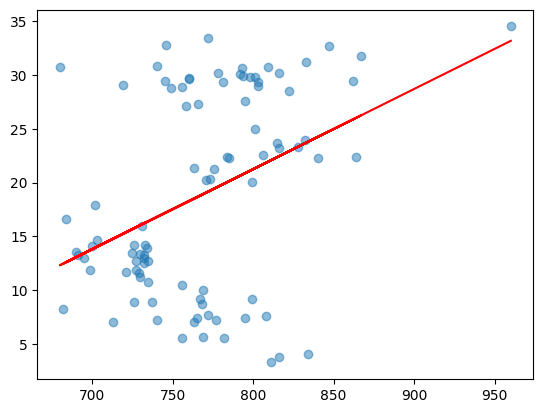

PearsonRResult(statistic=0.38988984593753145, pvalue=0.00013332129494812595)


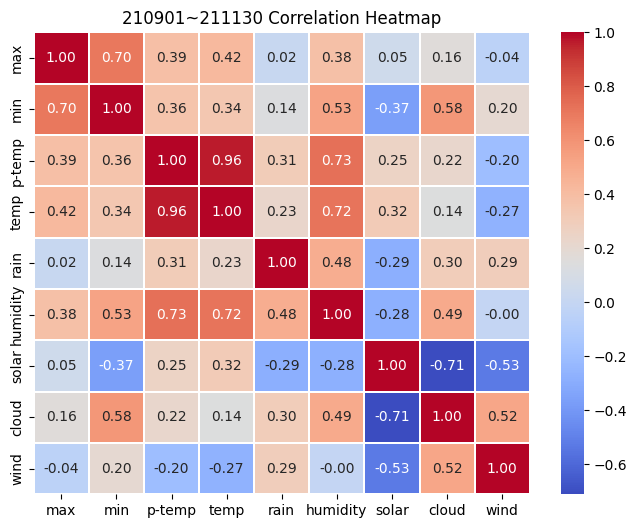

In [ ]:
# 210901~211130
data = pd.read_excel("jeju_asos_data.xlsx")

df = data.iloc[243:334]
print(df)

max = df['max'].values
min = df['min'].values
p_temp = df['p-temp'].values
temp = df['temp'].values
rain = df['rain'].values
humidity = df['humidity'].values
solar = df['solar'].values
cloud = df['cloud'].values
wind = df['wind'].values

x = max
y = p_temp

plt.scatter(x, y, alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope*x + intercept, color='red', label='Trendline')
plt.show()

print(stats.pearsonr(x,y))

# 주어진 데이터
data = df[['max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind']]

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('210901~211130 Correlation Heatmap')
plt.show()

         date   max  min  p-temp  temp  rain  humidity  solar  cloud  wind
334  20211201   873  605     2.4   8.0   1.0      63.8   2.50    9.4   7.7
335  20211202   850  615     4.3   9.1   1.1      65.0   4.29    8.4   3.7
336  20211203   830  569     5.3  11.2   NaN      56.0   6.78    7.6   6.1
337  20211204   786  493     5.7  11.3   NaN      60.6  11.37    4.9   4.0
338  20211205   791  494     5.6   9.7   NaN      62.0  11.93    2.4   2.1
..        ...   ...  ...     ...   ...   ...       ...    ...    ...   ...
419  20220224  1034  749    -4.3   3.4   NaN      59.4   3.91    6.4   4.2
420  20220225   978  588     0.5   6.6   NaN      54.6  19.56    1.4   2.6
421  20220226   897  496     1.3   9.8   NaN      51.8  19.04    1.8   4.5
422  20220227   915  447     1.6   7.4   NaN      49.9  20.32    0.1   3.3
423  20220228   854  675     0.7   8.7   NaN      57.0   7.34    6.4   1.9

[90 rows x 10 columns]


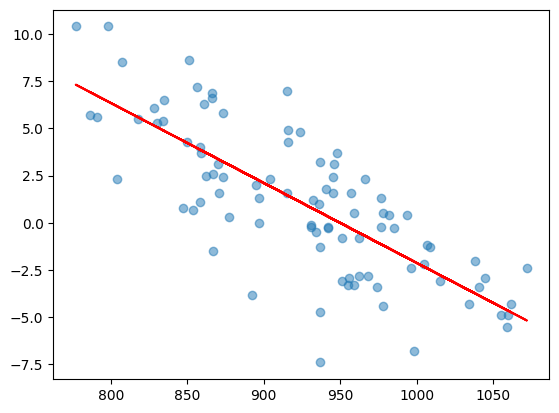

PearsonRResult(statistic=-0.7689083443567357, pvalue=8.807575676685305e-19)


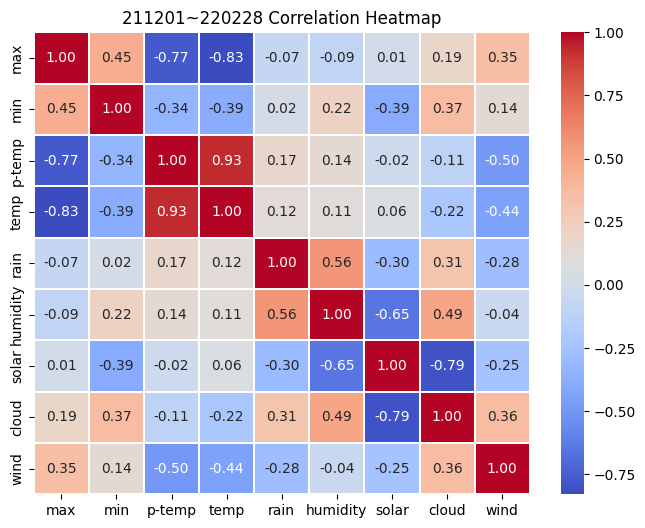

In [ ]:
# 211201~220228
data = pd.read_excel("jeju_asos_data.xlsx")

df = data.iloc[334:424]
print(df)

max = df['max'].values
min = df['min'].values
p_temp = df['p-temp'].values
temp = df['temp'].values
rain = df['rain'].values
humidity = df['humidity'].values
solar = df['solar'].values
cloud = df['cloud'].values
wind = df['wind'].values

x = max
y = p_temp

plt.scatter(x, y, alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope*x + intercept, color='red', label='Trendline')
plt.show()

print(stats.pearsonr(x,y))

# 주어진 데이터
data = df[['max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind']]

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('211201~220228 Correlation Heatmap')
plt.show()

         date  max  min  p-temp  temp  rain  humidity  solar  cloud  wind
424  20220301  872  570     4.1  10.1   3.8      86.8   4.01    9.8   3.4
425  20220302  962  577     1.4   6.4   NaN      58.6  13.60    3.9   4.3
426  20220303  902  541     2.8  10.0   NaN      53.8  17.83    0.4   3.3
427  20220304  860  510     5.7  12.6   NaN      54.6  13.44    4.6   2.9
428  20220305  919  463     1.5   8.9   0.0      61.5  18.57    4.3   5.0
..        ...  ...  ...     ...   ...   ...       ...    ...    ...   ...
511  20220527  751  497    26.4  23.2   NaN      37.6  28.75    1.5   4.3
512  20220528  719  492    25.8  21.9   NaN      60.8  19.06    7.8   3.0
513  20220529  715  505    25.0  21.1   0.0      76.0  12.27    8.1   2.6
514  20220530  740  531    25.3  20.3   0.0      88.5  12.47    9.1   3.2
515  20220531  734  508    25.1  20.9   NaN      59.9  26.78    6.9   2.1

[92 rows x 10 columns]


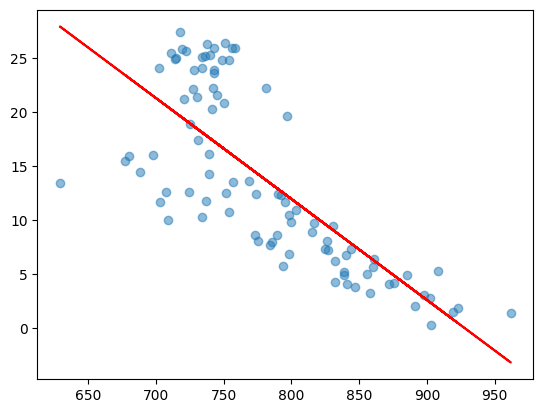

PearsonRResult(statistic=-0.7553148097741521, pvalue=3.352126392850272e-18)


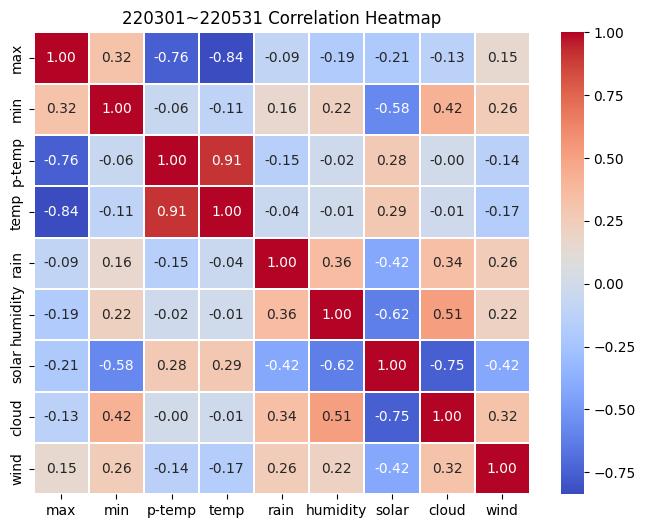

In [ ]:
# 220301~220531
data = pd.read_excel("jeju_asos_data.xlsx")

df = data.iloc[424:516]
print(df)

max = df['max'].values
min = df['min'].values
p_temp = df['p-temp'].values
temp = df['temp'].values
rain = df['rain'].values
humidity = df['humidity'].values
solar = df['solar'].values
cloud = df['cloud'].values
wind = df['wind'].values

x = max
y = p_temp

plt.scatter(x, y, alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope*x + intercept, color='red', label='Trendline')
plt.show()

print(stats.pearsonr(x,y))

# 주어진 데이터
data = df[['max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind']]

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('220301~220531 Correlation Heatmap')
plt.show()

         date  max  min  p-temp  temp  rain  humidity  solar  cloud  wind
516  20220601  714  431    26.3  21.0   NaN      69.0  23.50    6.8   1.9
517  20220602  757  529    27.2  21.7   NaN      77.8  25.92    5.1   2.3
518  20220603  762  532    25.2  21.2   NaN      83.4  27.24    3.4   2.4
519  20220604  725  527    27.2  23.5   0.0      70.3  20.80    6.8   4.5
520  20220605  702  537    24.3  19.1  45.0      94.5   3.61   10.0   4.5
..        ...  ...  ...     ...   ...   ...       ...    ...    ...   ...
603  20220827  838  631    30.9  26.1   0.0      66.4  19.31    5.8   3.0
604  20220828  815  580    29.5  24.4   NaN      70.8  16.82    5.0   3.5
605  20220829  926  605    29.9  25.9   NaN      76.4  19.01    6.1   3.5
606  20220830  953  636    34.1  28.2   0.0      69.0  18.14    5.4   2.5
607  20220831  888  658    30.3  25.9   1.2      80.8  14.68    8.8   3.1

[92 rows x 10 columns]


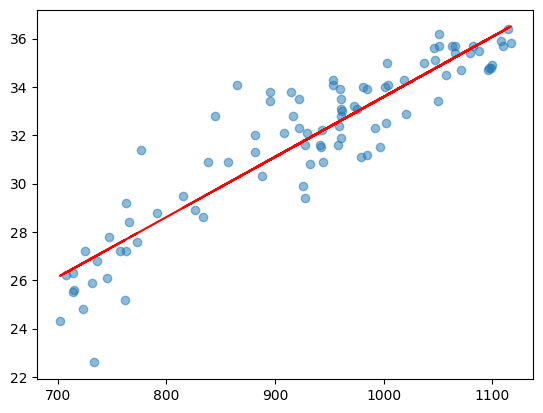

PearsonRResult(statistic=0.9137490670702058, pvalue=5.702336089968871e-37)


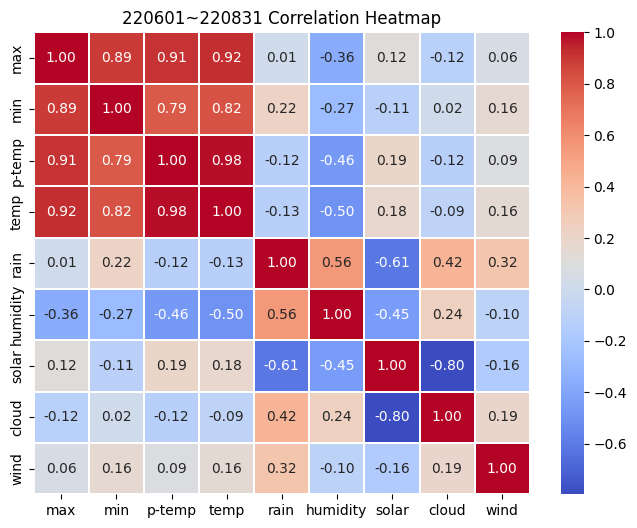

In [ ]:
# 220601~220831
data = pd.read_excel("jeju_asos_data.xlsx")

df = data.iloc[516:608]
print(df)

max = df['max'].values
min = df['min'].values
p_temp = df['p-temp'].values
temp = df['temp'].values
rain = df['rain'].values
humidity = df['humidity'].values
solar = df['solar'].values
cloud = df['cloud'].values
wind = df['wind'].values

x = max
y = p_temp

plt.scatter(x, y, alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope*x + intercept, color='red', label='Trendline')
plt.show()

print(stats.pearsonr(x,y))

# 주어진 데이터
data = df[['max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind']]

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('220601~220831 Correlation Heatmap')
plt.show()

         date  max  min  p-temp  temp   rain  humidity  solar  cloud  wind
608  20220901  907  632    27.7  24.8    0.0      82.8   4.73    9.9   3.7
609  20220902  886  621    27.4  23.2   49.3      95.4   1.44   10.0   3.9
610  20220903  839  610    31.4  25.9    6.4      93.4  10.46    9.6   3.9
611  20220904  843  616    32.1  26.4   10.4      91.8   6.73    9.8   3.1
612  20220905  870  610    30.2  26.5  174.0      96.3   1.87   10.0   5.9
..        ...  ...  ...     ...   ...    ...       ...    ...    ...   ...
694  20221126  741  459    10.4  14.6    0.0      68.5   7.95    3.6   3.0
695  20221127  731  452     7.1  14.3    NaN      60.1   9.70    5.8   2.4
696  20221128  757  542    16.2  21.9   19.4      72.9   8.95    8.9   3.3
697  20221129  805  544     4.9  14.1   18.6      80.5   0.99   10.0   4.8
698  20221130  897  606    -1.2   5.7    0.0      68.5   1.04    9.4   6.4

[91 rows x 10 columns]


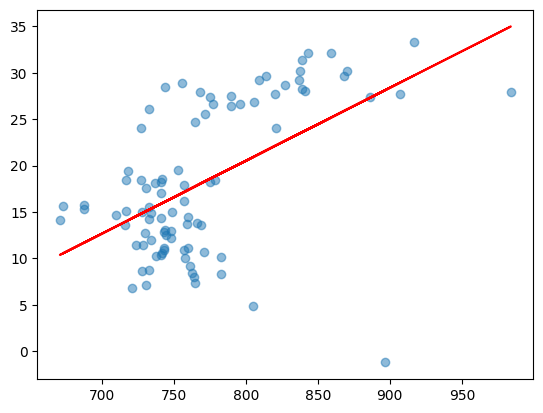

PearsonRResult(statistic=0.5405955590089827, pvalue=3.177563482460588e-08)


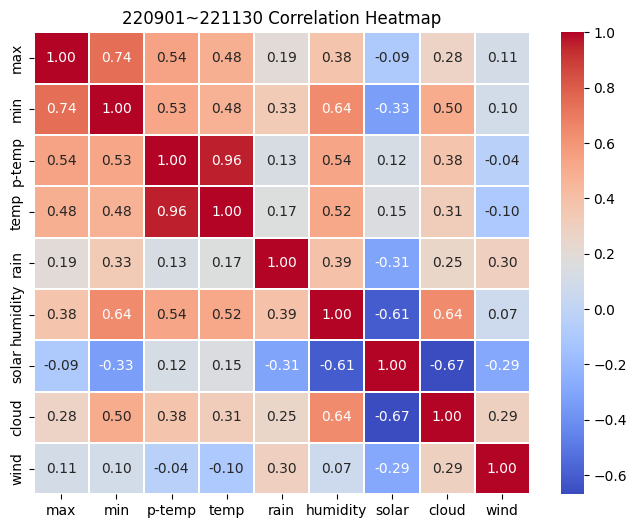

In [ ]:
# 220901~221130
data = pd.read_excel("jeju_asos_data.xlsx")

df = data.iloc[608:699]
print(df)

max = df['max'].values
min = df['min'].values
p_temp = df['p-temp'].values
temp = df['temp'].values
rain = df['rain'].values
humidity = df['humidity'].values
solar = df['solar'].values
cloud = df['cloud'].values
wind = df['wind'].values

x = max
y = p_temp

plt.scatter(x, y, alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope*x + intercept, color='red', label='Trendline')
plt.show()

print(stats.pearsonr(x,y))

# 주어진 데이터
data = df[['max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind']]

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('220901~221130 Correlation Heatmap')
plt.show()

         date  max  min  p-temp  temp  rain  humidity  solar  cloud  wind
699  20221201  897  645    -1.4   5.5   0.0      63.9   3.68    7.6   3.9
700  20221202  889  594     2.5   7.1   0.1      66.0   7.33    6.6   2.7
701  20221203  807  619     3.9  10.4   1.3      85.4   1.64   10.0   2.0
702  20221204  821  611     3.5   8.1   0.3      63.9   5.57    9.3   4.3
703  20221205  927  627    -0.3   5.8   NaN      61.0   5.33    7.1   5.2
..        ...  ...  ...     ...   ...   ...       ...    ...    ...   ...
784  20230224  933  632     2.9   8.5   2.0      62.8  13.07    5.1   3.9
785  20230225  981  596    -1.1   4.8   NaN      60.0   9.57    6.3   4.9
786  20230226  928  526    -0.7   5.9   NaN      54.9  20.06    2.1   2.9
787  20230227  928  583     0.0   7.8   NaN      63.1  20.46    0.5   1.7
788  20230228  871  559     3.3  11.4   NaN      66.4  20.28    2.5   2.3

[90 rows x 10 columns]


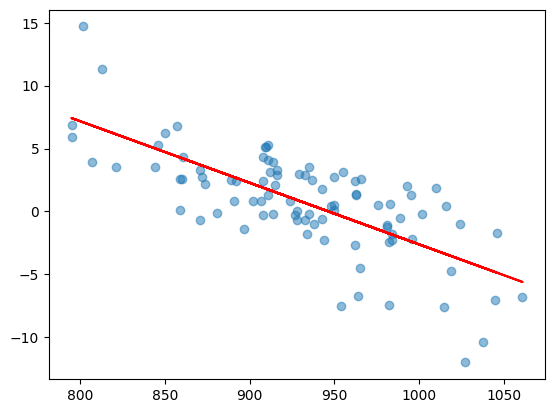

PearsonRResult(statistic=-0.719646723896623, pvalue=1.3345531467518824e-15)


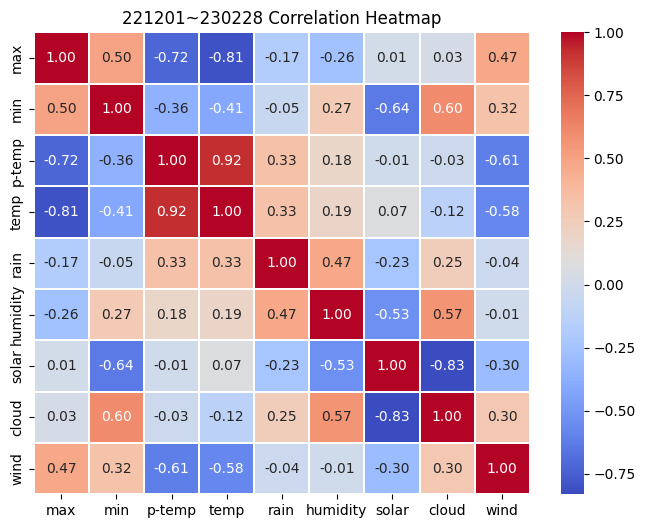

In [ ]:
# 221201~230228
data = pd.read_excel("jeju_asos_data.xlsx")

df = data.iloc[699:789]
print(df)

max = df['max'].values
min = df['min'].values
p_temp = df['p-temp'].values
temp = df['temp'].values
rain = df['rain'].values
humidity = df['humidity'].values
solar = df['solar'].values
cloud = df['cloud'].values
wind = df['wind'].values

x = max
y = p_temp

plt.scatter(x, y, alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope*x + intercept, color='red', label='Trendline')
plt.show()

print(stats.pearsonr(x,y))

# 주어진 데이터
data = df[['max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind']]

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('221201~230228 Correlation Heatmap')
plt.show()

         date  max  min  p-temp  temp  rain  humidity  solar  cloud  wind
789  20230301  888  628     3.9  10.9   4.0      72.4   4.07    7.6   3.8
790  20230302  973  590     0.8   6.7   NaN      49.4  20.20    2.5   5.0
791  20230303  904  604    -0.2   7.6   NaN      52.9  17.37    5.8   1.7
792  20230304  870  514     3.7   9.7   NaN      55.4  17.25    4.0   2.2
793  20230305  856  506     4.3  11.0   NaN      59.0  17.75    1.3   2.8
..        ...  ...  ...     ...   ...   ...       ...    ...    ...   ...
876  20230527  713  531    27.0  23.4   NaN      71.3  10.05    9.0   2.3
877  20230528  746  524    28.5  24.2   NaN      79.1  23.79    6.8   2.2
878  20230529  769  533    31.1  24.3   6.4      86.1  15.85    8.5   2.5
879  20230530  770  533    26.4  21.0  32.8      96.9   4.81   10.0   2.7
880  20230531  755  543    25.6  20.5  10.2      86.1  20.27    6.9   4.2

[92 rows x 10 columns]


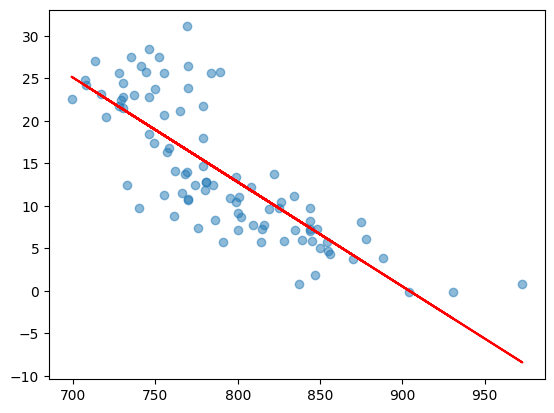

PearsonRResult(statistic=-0.7974968747563939, pvalue=1.8565894856728826e-21)


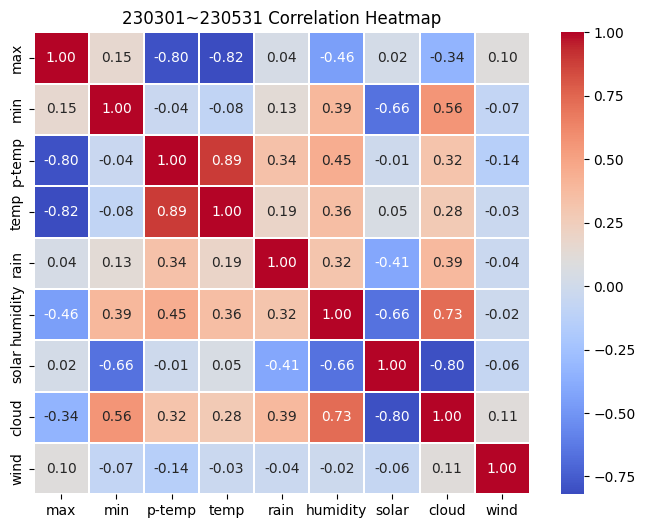

In [ ]:
# 230301~230531
data = pd.read_excel("jeju_asos_data.xlsx")

df = data.iloc[789:881]
print(df)

max = df['max'].values
min = df['min'].values
p_temp = df['p-temp'].values
temp = df['temp'].values
rain = df['rain'].values
humidity = df['humidity'].values
solar = df['solar'].values
cloud = df['cloud'].values
wind = df['wind'].values

x = max
y = p_temp

plt.scatter(x, y, alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope*x + intercept, color='red', label='Trendline')
plt.show()

print(stats.pearsonr(x,y))

# 주어진 데이터
data = df[['max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind']]

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('230301~230531 Correlation Heatmap')
plt.show()

         date   max  min  p-temp  temp  rain  humidity  solar  cloud  wind
881  20230601   778  531    26.8  20.7  16.4      94.3  10.37    8.6   2.4
882  20230602   771  539    27.1   NaN   4.5       NaN  21.08    NaN   2.5
883  20230603   733  509    25.6  21.3   NaN      71.0  29.05    1.8   2.9
884  20230604   716  518    27.2  23.1   0.0      49.4  20.39    8.3   2.3
885  20230605   725  525    22.9  20.1   1.3      66.0   4.92   10.0   2.1
..        ...   ...  ...     ...   ...   ...       ...    ...    ...   ...
968  20230827   953  591    33.3  28.5   NaN      71.8  23.38    3.5   3.1
969  20230828  1018  623    33.4  29.6   4.1      69.5  19.67    7.6   2.9
970  20230829  1001  637    33.6  28.0   6.3      82.3  13.64    9.1   1.9
971  20230830   937  630    28.5  23.9  47.7      87.0   1.38    9.5   2.3
972  20230831   897  572    28.6  24.6   1.5      71.4  20.45    6.5   2.2

[92 rows x 10 columns]


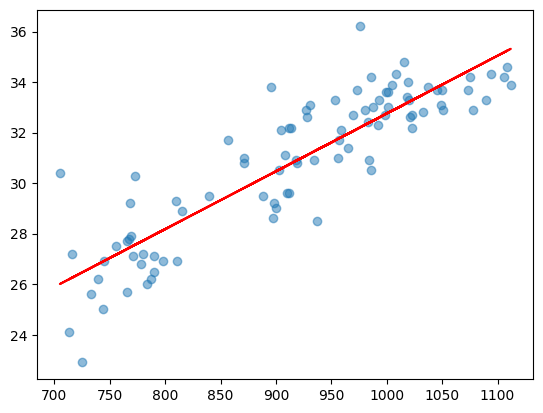

PearsonRResult(statistic=0.8789895328620532, pvalue=1.0761643627740775e-30)


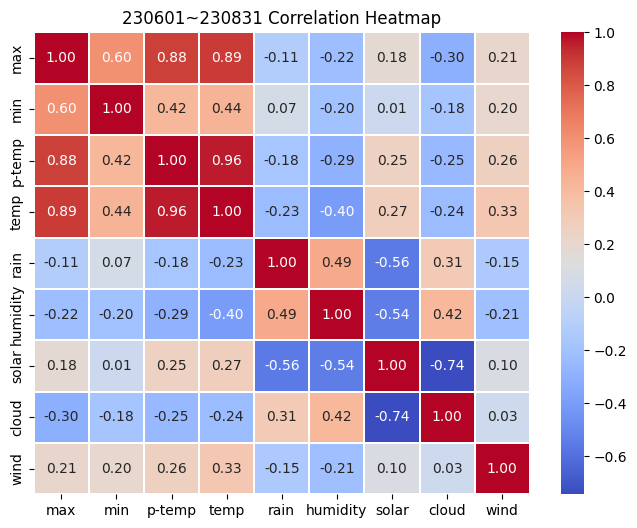

In [ ]:
# 230601~230831
data = pd.read_excel("jeju_asos_data.xlsx")

df = data.iloc[881:973]
print(df)

max = df['max'].values
min = df['min'].values
p_temp = df['p-temp'].values
temp = df['temp'].values
rain = df['rain'].values
humidity = df['humidity'].values
solar = df['solar'].values
cloud = df['cloud'].values
wind = df['wind'].values

x = max
y = p_temp

plt.scatter(x, y, alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope*x + intercept, color='red', label='Trendline')
plt.show()

print(stats.pearsonr(x,y))

# 주어진 데이터
data = df[['max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind']]

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('230601~230831 Correlation Heatmap')
plt.show()

          date   max  min  p-temp  temp  rain  humidity  solar  cloud  wind
973   20230901   902  585    28.9  25.0   2.4      83.0   7.83    8.4   2.1
974   20230902   921  593    31.2  27.4   0.1      72.6  19.31    6.6   2.2
975   20230903   946  599    33.5  28.2   NaN      68.1  22.36    5.3   2.5
976   20230904  1003  597    30.2  26.7   NaN      78.9  21.68    4.5   3.2
977   20230905   976  609    29.6  26.9   0.8      67.6  20.20    7.0   2.6
...        ...   ...  ...     ...   ...   ...       ...    ...    ...   ...
1059  20231126   771  532     2.4   8.9   NaN      60.4   8.52    1.5   2.0
1060  20231127   811  576     6.6  13.1   0.0      66.1   3.43    7.1   4.1
1061  20231128   831  585     4.9  10.7   0.0      55.5   4.80    5.9   4.6
1062  20231129   813  603     5.8  11.2   0.0      58.9   6.82    7.9   2.9
1063  20231130   899  609     0.8   6.6   0.0      63.6   0.82    9.4   5.7

[91 rows x 10 columns]


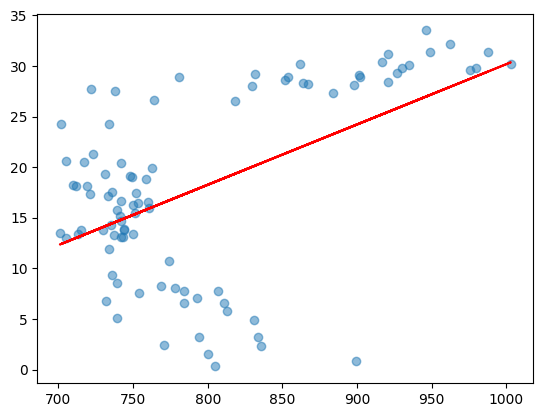

PearsonRResult(statistic=0.5204492690693248, pvalue=1.2373887064337396e-07)


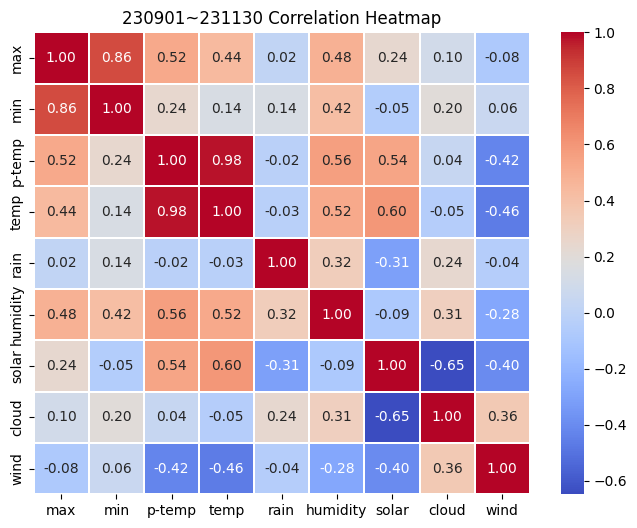

In [ ]:
# 230901~231130
data = pd.read_excel("jeju_asos_data.xlsx")

df = data.iloc[973:1064]
print(df)

max = df['max'].values
min = df['min'].values
p_temp = df['p-temp'].values
temp = df['temp'].values
rain = df['rain'].values
humidity = df['humidity'].values
solar = df['solar'].values
cloud = df['cloud'].values
wind = df['wind'].values

x = max
y = p_temp

plt.scatter(x, y, alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope*x + intercept, color='red', label='Trendline')
plt.show()

print(stats.pearsonr(x,y))

# 주어진 데이터
data = df[['max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind']]

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('230901~231130 Correlation Heatmap')
plt.show()

          date   max  min  p-temp  temp  rain  humidity  solar  cloud  wind
1064  20231201   903  633     1.7   7.1   2.9      62.3   0.62    9.1   5.2
1065  20231202   813  639     4.1   9.1   NaN      52.9   2.53    8.1   3.0
1066  20231203   804  561     4.5  10.1   NaN      55.0   6.07    5.1   3.4
1067  20231204   845  621     2.7   8.5   NaN      68.5  10.41    4.0   2.0
1068  20231205   830  590     5.9  11.7   NaN      60.0  11.36    1.1   1.9
1069  20231206   819  602     7.3  13.6   0.1      61.4   4.94    5.4   NaN
1070  20231207   841  598     6.7  12.0   NaN      45.1  12.54    0.6   4.1
1071  20231208   778  602     6.3  13.9   NaN      53.6  12.38    0.3   2.3
1072  20231209   738  586    10.3  15.8   NaN      64.8   8.28    4.4   2.5
1073  20231210   731  540    13.0  17.0  13.8      71.5   7.57    6.4   3.0
1074  20231211   779  563    13.6  17.0  10.1      80.9   2.17    9.9   4.7
1075  20231212   811  584     8.9  11.3   0.1      78.0   0.86   10.0   3.8
1076  202312

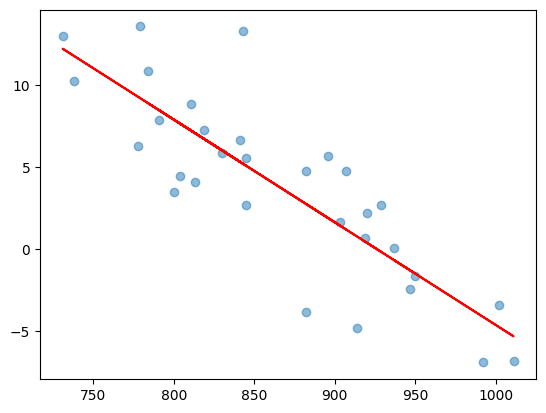

PearsonRResult(statistic=-0.8407360379634284, pvalue=3.234292182613816e-09)


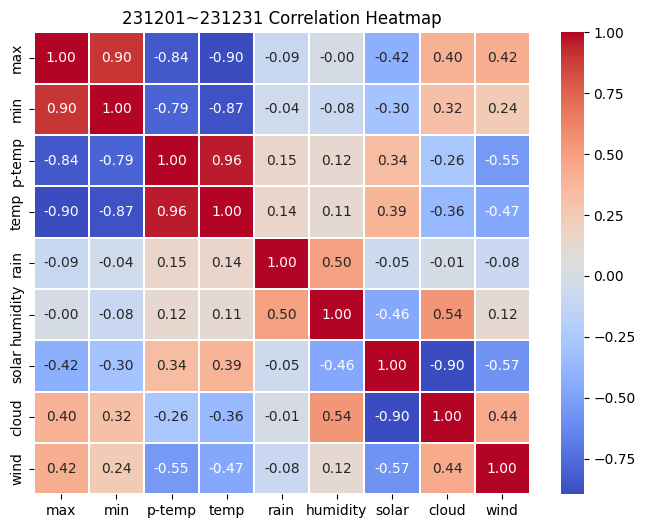

In [ ]:
# 231201~231231
data = pd.read_excel("jeju_asos_data.xlsx")

df = data.iloc[1064:1095]
print(df)

max = df['max'].values
min = df['min'].values
p_temp = df['p-temp'].values
temp = df['temp'].values
rain = df['rain'].values
humidity = df['humidity'].values
solar = df['solar'].values
cloud = df['cloud'].values
wind = df['wind'].values

x = max
y = p_temp

plt.scatter(x, y, alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope*x + intercept, color='red', label='Trendline')
plt.show()

print(stats.pearsonr(x,y))

# 주어진 데이터
data = df[['max', 'min', 'p-temp', 'temp', 'rain', 'humidity', 'solar',
       'cloud', 'wind']]

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('231201~231231 Correlation Heatmap')
plt.show()